In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_20newsgroups

In [10]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [12]:
#defining all categories
categories=['alt.atheism','comp.graphics','comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x',
 'misc.forsale','rec.autos','rec.motorcycles','rec.sport.baseball',
 'rec.sport.hockey','sci.crypt','sci.electronics','sci.med',
 'sci.space','soc.religion.christian','talk.politics.guns',
'talk.politics.mideast','talk.politics.misc','talk.religion.misc']

#training the data on these categories
train=fetch_20newsgroups(subset='train',categories=categories)
#testing the data on these categories
test=fetch_20newsgroups(subset='test',categories=categories)
#printing the  training data value at 5th position data 

#print(test.data[5])
#printing the length of the training data
print(len(train.data))

11314


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer #<-- these weights different words in the document based on many features like from,crime etc as per the appearence
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline #<--these is used for information transfer
#creating a model based on multinomial naive bayes
model=make_pipeline(TfidfVectorizer(),MultinomialNB())#<--the information we are getting in TfidfVectorizer is pumped in MultinomialNM() using make_pipeline function

#training the model with the train data
model.fit(train.data,train.target)

#creating the label for test data
labels=model.predict(test.data)


Text(110.44999999999996, 0.5, 'predicted labels')

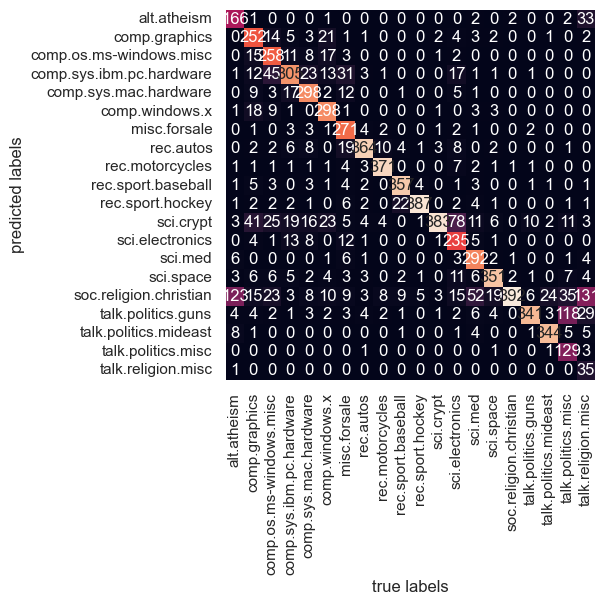

In [14]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
#plotting heatmap of confusion matrix
plt.xlabel("true labels")
plt.ylabel("predicted labels")

In [19]:
#predicting categories on new data based on trained data
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    print(pred)
    return train.target_names[pred[0]]
    
predict_category("Messi")


[13]


'sci.med'